In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Introduction

The sinking of the Titanic remains one of history's most famous maritime tragedies. Through the analysis of passenger data, we embark on an analytical journey to elucidate the factors that influenced survival during this catastrophe. Using advanced predictive modeling techniques, our aim is to develop a model capable of discerning, with optimum accuracy, which passengers survived and which unfortunately did not.

Here are the steps involved in meeting the challenge of predicting the survival of the Titanic's passengers:

Data acquisition:
We'll start by downloading the Titanic data sets, including the training set to build the model and the test set to generate the predictions.

Data Exploration (EDA):
In-depth exploratory analysis will be carried out, examining data characteristics, detecting missing values and exploring relationships between variables. Use visualizations to better grasp the structure of the data.

Model selection :
Choose a model suitable for binary prediction

Prediction generation:
Finally, use the chosen model to generate predictions on the test set. Each prediction must be a binary value, either 0 for non-survival or 1 for survival.

Data Description:
The dataset contains the following variables:

survival: Survival (0 = No, 1 = Yes)
pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Male or Female
age: Age in years
sibsp: number of siblings / spouses aboard the Titanic
parch: number of parents / children aboard the Titanic
ticket: Ticket number
fare: Ticket price
cabin: Cabin number
embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is * estimated, it is in the form of xx.5.
sibsp: The dataset defines family relations as follows:
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations as follows:
Parent = mother, father
Child = daughter, son, stepdaughter, stepson Some children traveled only with a nanny, therefore parch=0 for them.

# Load dataset

In [2]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_gender=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# EXPLORATORY DATA ANALYSIS

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**there are 891 passengers on board our boat**

In [7]:
df_train = df_train.drop(["Name","Ticket","Cabin"] , axis="columns")

In [8]:
df_test = df_test.drop(["Name","Ticket","Cabin"] , axis="columns")

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

In [11]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

**NON-NUMERIC COLUMN CONVERSION**

In [12]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import  MinMaxScaler

In [13]:
#Encoding Categorical Values
encoder = LabelEncoder()
df_train["Sex"] = encoder.fit_transform(df_train["Sex"])
df_train["Embarked"] = encoder.fit_transform(df_train["Embarked"])
df_test["Sex"] = encoder.fit_transform(df_test["Sex"])
df_test["Embarked"] = encoder.fit_transform(df_test["Embarked"])

*This code is used to encode categorical values in a pandas DataFrame using the LabelEncoder class from the sklearn.preprocessing library in Python.
This code transforms the categorical values in the "Sex" and "Embarked" columns of the df DataFrame into integers.*

In [14]:
df_test.head()



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [15]:
df_train.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**EMPUTATION OF NULL VALUES FROM OUR DATABASE **

In [16]:
columns = df_train.columns

In [17]:
from sklearn.impute import KNNImputer

In [18]:
imputer = KNNImputer(n_neighbors=2)
df_train = imputer.fit_transform(df_train)

In [19]:
df_train = pd.DataFrame(df_train, columns = columns)

In [20]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Age'].fillna(df_test['Fare'].median())
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**Age distribution of passengers on board **

<Axes: >

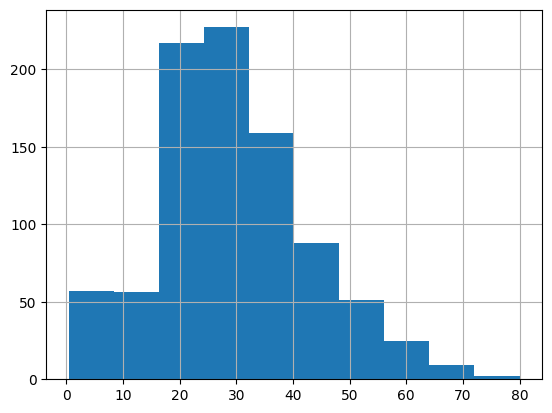

In [22]:
# Tracer un histogramme de l'âge des passagers
df_train['Age'].hist()



<Axes: xlabel='Survived', ylabel='count'>

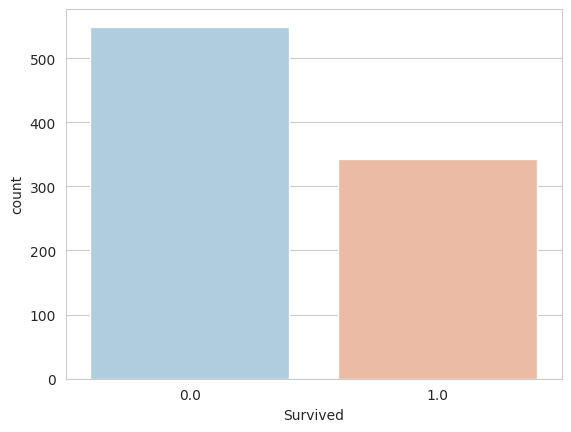

In [23]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

**Survival by gender**

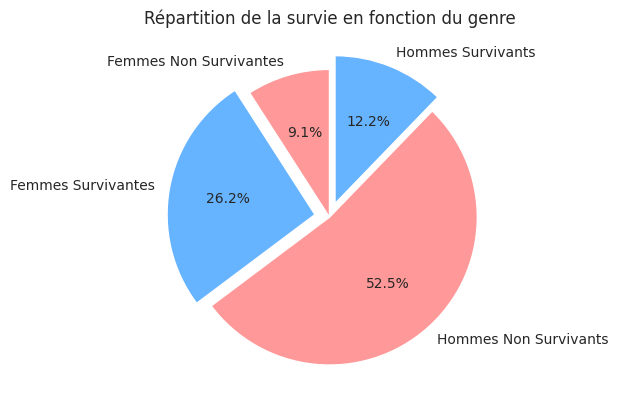

In [24]:
import matplotlib.pyplot as plt

# Créer une figure et des axes
fig, ax = plt.subplots()

# Grouper les données par sexe et survie, puis compter le nombre de passagers
survival_counts = df_train.groupby(['Sex', 'Survived']).size().unstack()

# Tracer le camembert
colors = ['#ff9999','#66b3ff']
labels = ['Femmes Non Survivantes', 'Femmes Survivantes', 'Hommes Non Survivants', 'Hommes Survivants']
explode = (0, 0.1, 0, 0.1)  # Mettez en surbrillance les sections Survivantes
ax.pie(survival_counts.values.flatten(), labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Ajouter un titre
ax.set_title('Répartition de la survie en fonction du genre')

# Afficher le camembert
plt.show()


<Axes: xlabel='Survived', ylabel='count'>

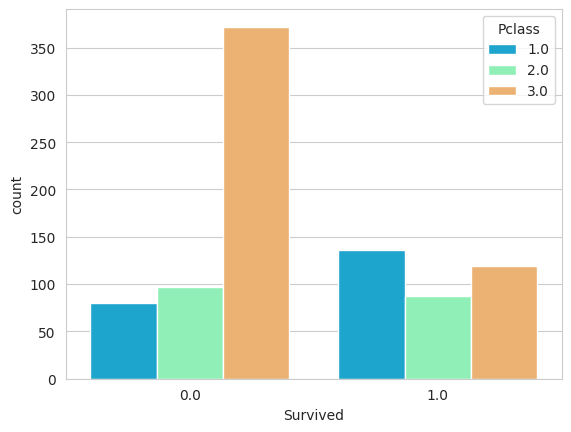

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

/tmp/ipykernel_19/372795875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

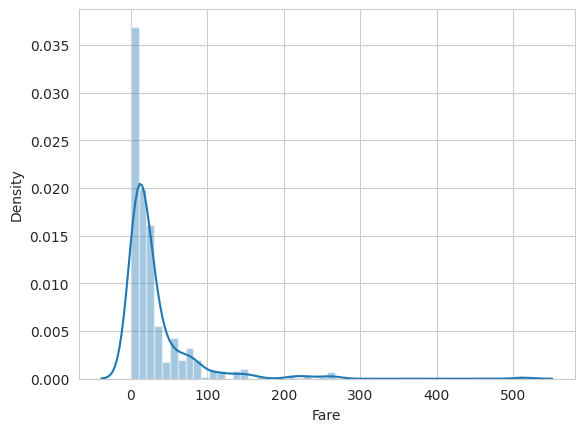

In [26]:
import seaborn as sns
sns.distplot(df_train['Fare'])

<Axes: xlabel='Pclass', ylabel='Age'>

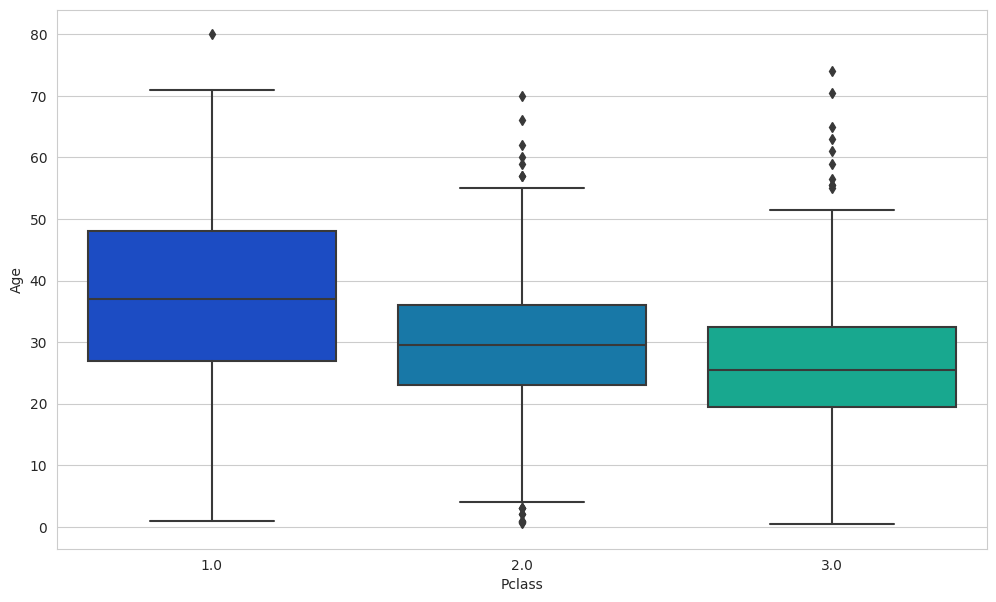

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

**Histogram of women who survived**

In [28]:
import plotly.express as px

# Filtrer les données pour inclure uniquement les femmes qui ont survécu
survived_women = df_train[(df_train['Sex'] == 0) & (df_train['Survived'] == 1)]

# Tracer l'histogramme des femmes qui ont survécu
fig = px.histogram(survived_women, x='Age', nbins=20, title='Histogramme des femmes qui ont survécu')
fig.show()


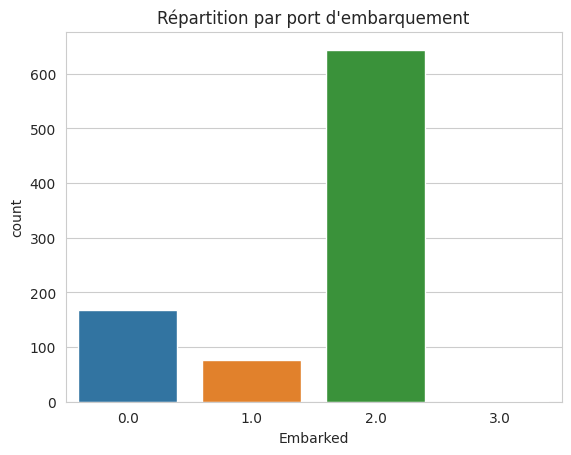

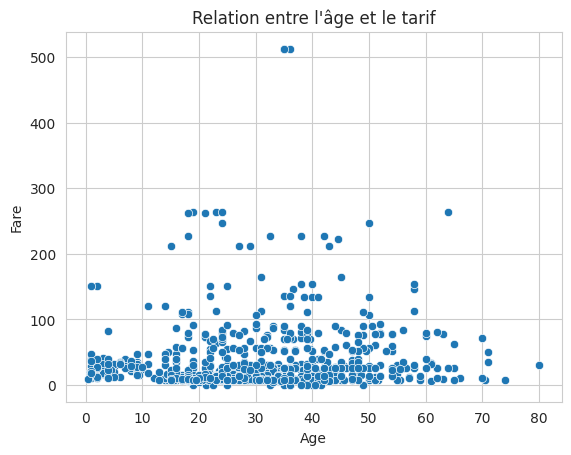

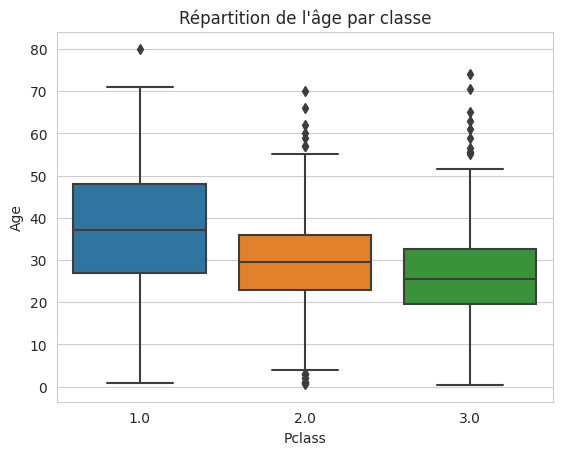

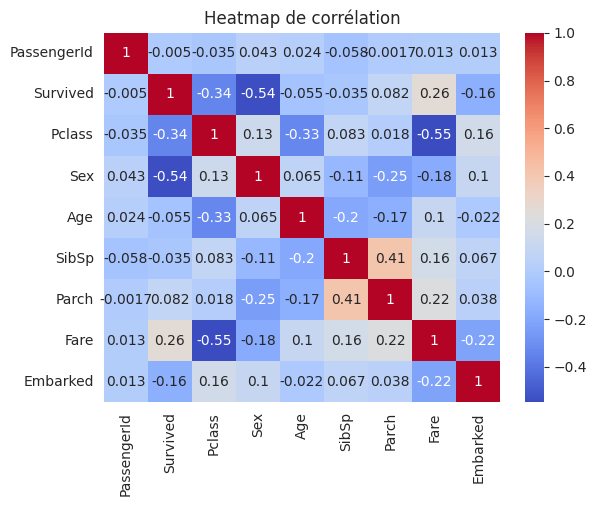

/tmp/ipykernel_19/1972868563.py:36: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




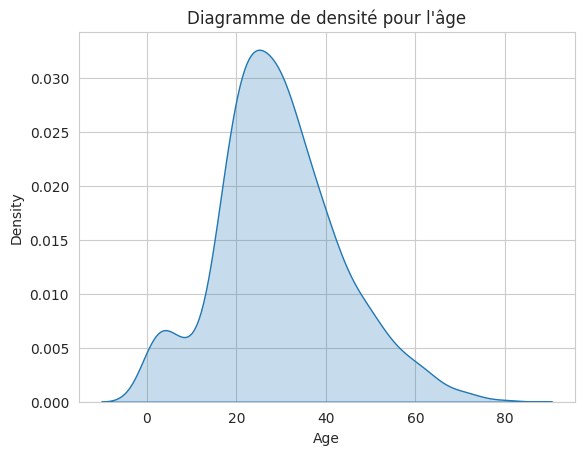

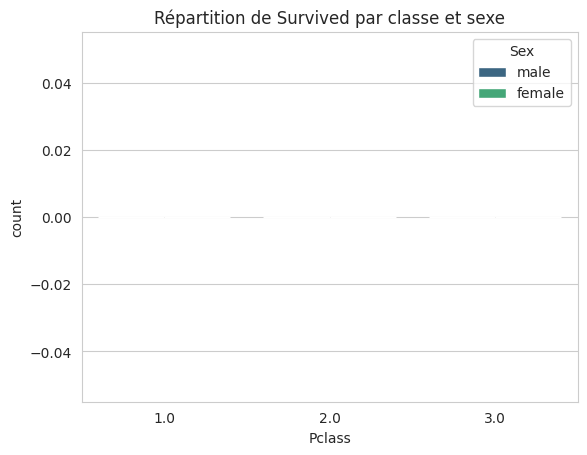

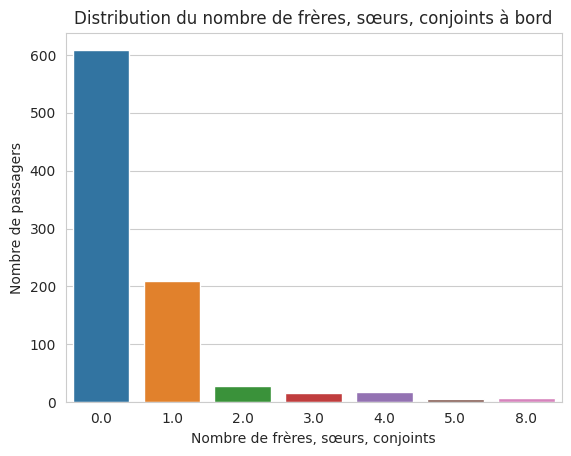

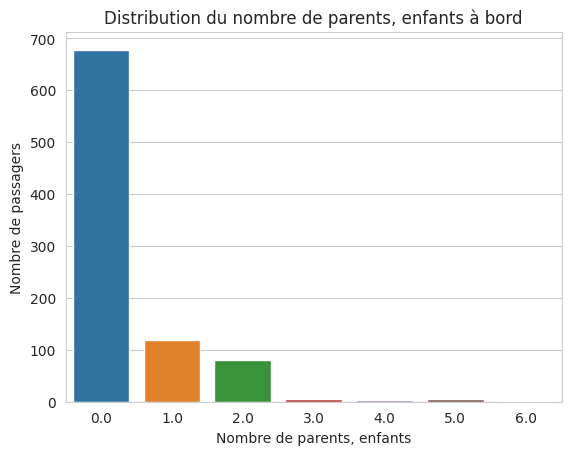

In [29]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Ajout de l'importation de la bibliothèque Pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
# Assurez-vous d'ajuster le chemin du fichier CSV en conséquence
df_train 

# Diagramme en barres pour Embarked
sns.countplot(x='Embarked', data=df_train)
plt.title('Répartition par port d\'embarquement')
plt.show()

# Diagramme de dispersion entre l'âge et le tarif
sns.scatterplot(x='Age', y='Fare', data=df_train)
plt.title('Relation entre l\'âge et le tarif')
plt.show()

# Diagramme en boîte pour Pclass par rapport à l'âge
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.title('Répartition de l\'âge par classe')
plt.show()

# Exclure les colonnes non numériques du calcul de la corrélation
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_train[numeric_columns].corr()

# Heatmap de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de corrélation')
plt.show()


# Diagramme de densité pour l'âge
sns.kdeplot(df_train['Age'].dropna(), shade=True)
plt.title('Diagramme de densité pour l\'âge')
plt.show()

# Graphique de barres empilées pour Survived par classe et sexe
sns.countplot(x='Pclass', hue='Sex', data=df_train, hue_order=['male', 'female'], palette='viridis')
plt.title('Répartition de Survived par classe et sexe')
plt.show()

# Diagramme en barres pour SibSp
sns.countplot(x='SibSp', data=df_train)
plt.title('Distribution du nombre de frères, sœurs, conjoints à bord')
plt.xlabel('Nombre de frères, sœurs, conjoints')
plt.ylabel('Nombre de passagers')
plt.show()

# Diagramme en barres pour Parch
sns.countplot(x='Parch', data=df_train)
plt.title('Distribution du nombre de parents, enfants à bord')
plt.xlabel('Nombre de parents, enfants')
plt.ylabel('Nombre de passagers')
plt.show()






# DIFFERENT MODELS

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [31]:
# Charger les données
X = df_train.drop('Survived', axis=1)  # supprimer la colonne cible
y = df_train['Survived']  # définir la colonne cible
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOGISTIC MODEL

In [32]:
# Créer et entraîner le modèle
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [33]:
# Prédire les résultats du test
predictions = model.predict(X_test)
# Évaluer le modèle
print("Accuracy: ", accuracy_score(y_test, predictions))


Accuracy:  0.8100558659217877


**EVALUATION DU MODELE**

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[90 15]
 [19 55]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# RANDOM FOREST

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Créer et entraîner le modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)
#model.score(X,y)


RandomForestClassifier()

In [39]:
# Prédire les résultats du test
predictions = model.predict(X_test)
# Évaluer le modèle
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.8044692737430168


In [40]:
print(confusion_matrix(y_test,predictions))

[[92 13]
 [22 52]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# DecisionTreeClassifier

In [42]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
##model.score(X,y)

DecisionTreeClassifier()

In [43]:
predictions = model.predict(X_test)
# Évaluer le modèle
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.7039106145251397


In [44]:
print(confusion_matrix(y_test,predictions))

[[78 27]
 [26 48]]


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       105
         1.0       0.64      0.65      0.64        74

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.70      0.70      0.70       179



# SVC

In [46]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

##model.score(X,y)


SVC()

In [47]:
predictions = model.predict(X_test)
# Évaluer le modèle
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.5977653631284916


In [48]:
print(confusion_matrix(y_test,predictions))

[[103   2]
 [ 70   4]]


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.60      0.98      0.74       105
         1.0       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [50]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
# Charger les données de test
#X_test = df_test

# Prédire les résultats du test
#predictions = model.predict(X_test)

#import pandas as pd

#sample_submission = pd.DataFrame({
    #'PassengerId': df_test.PassengerId, 
    #'Survived': predictions
#})

#sample_submission.to_csv("submission.csv", index=False)


In [52]:
model = RandomForestClassifier()
#model.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])
model.fit(df_train.drop(['Survived'],axis=1),df_train['Survived'])

RandomForestClassifier()

In [53]:
test_prediction = model.predict(df_test)
test_prediction = [ 1 if y>=0.5 else 0 for y in test_prediction]

In [54]:
test_pred = pd.DataFrame(test_prediction, columns= ['Survived'])

In [55]:
new_test = pd.concat([df_test, test_pred], axis=1, join='inner')

In [56]:
new_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,34.5,1,0
1,893,3,0,47.0,1,0,47.0,2,0
2,894,2,1,62.0,0,0,62.0,1,0
3,895,3,1,27.0,0,0,27.0,2,0
4,896,3,0,22.0,1,1,22.0,2,0


In [57]:
df= new_test[['PassengerId' ,'Survived']]

In [58]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [59]:
df.to_csv('predictions.csv' , index=False)

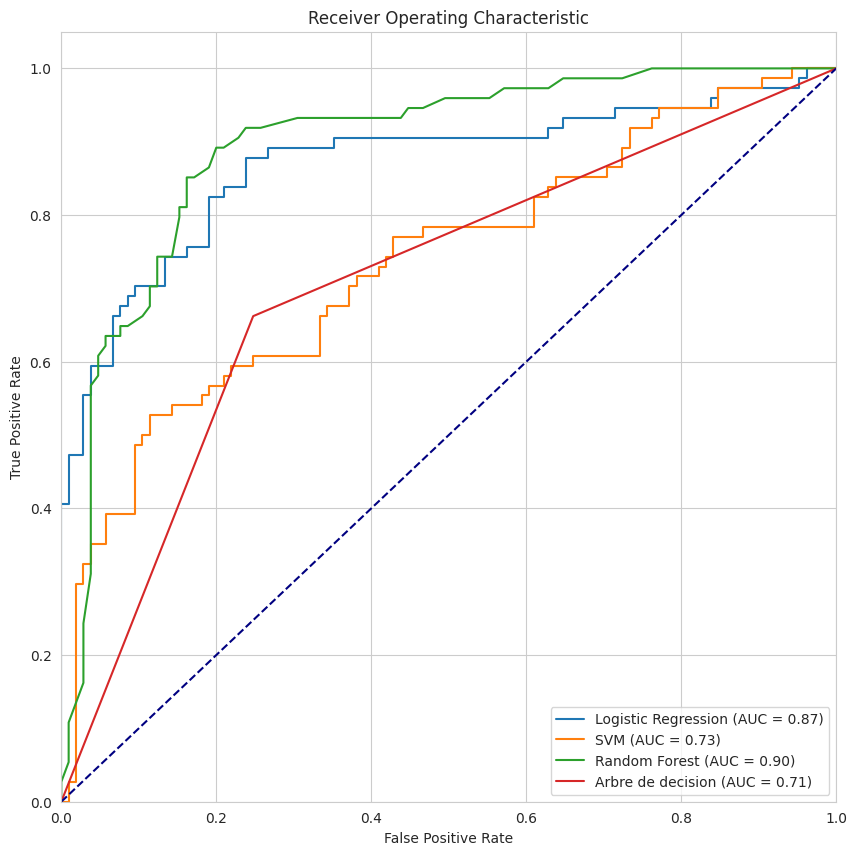

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Supposons que X_train, y_train, X_test, y_test soient vos ensembles de données

# Définir les modèles
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('SVM', SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('Arbre de decision', DecisionTreeClassifier())
]

plt.figure(figsize=(10, 10))

# Entraîner, prédire et tracer la courbe ROC pour chaque modèle
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Tracer la diagonale
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


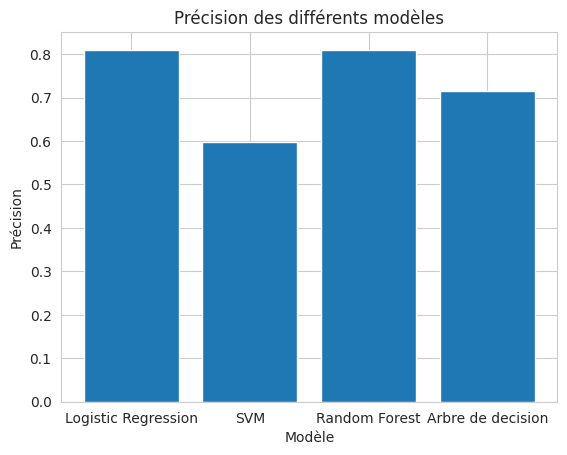

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Définir les modèles
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('SVM', SVC(probability=True)),
    ('Random Forest', RandomForestClassifier()),
    ('Arbre de decision', DecisionTreeClassifier())
]
# Liste pour stocker les précisions des modèles
accuracies = []

# Entraîner et évaluer chaque modèle
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Créer un graphique à barres pour visualiser les précisions
plt.bar([model[0] for model in models], accuracies)
plt.xlabel('Modèle')
plt.ylabel('Précision')
plt.title('Précision des différents modèles')
plt.show()
